Xin vui lòng tải dữ liệu từ website này ạ (Please download data from this website):  
https://www.kaggle.com/mlg-ulb/creditcardfraud
hoặc từ link driver này : https://drive.google.com/file/d/1CTAlmlREFRaEN3NoHHitewpqAtWS5cVQ/view

**IMPORT CÁC THƯ VIỆN CẦN THIẾT**

In [271]:

import pandas as pd 
import numpy as np 
import joblib 


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sb
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score,confusion_matrix, plot_confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_auc_score


 **ĐỌC DỮ LIỆU**

In [272]:
dataset = pd.read_csv('creditcard.csv')
dataset.shape

(284807, 31)

# TIỀN XỬ LÝ DỮ LIỆU

**KIỂM TRA DỮ LIỆU NHIỄU**

In [273]:
total = dataset.isnull().sum().sort_values(ascending = False)
percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [274]:
# kiểm tra các giá trị nhiễu 
dataset.isnull().values.sum()
# kiểm tra tổng các giá trị nhiễu
dataset.isnull().sum().max()

0

**SCALING Ở TIỀN XỬ LÝ DỮ LIỆU**

In [275]:
rob_scaler = RobustScaler()
dataset['scaled_amount'] = rob_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['scaled_time'] = rob_scaler.fit_transform(dataset['Time'].values.reshape(-1,1))

dataset.drop(['Time','Amount'], axis=1, inplace=True)
# đưa 2 cột amount vs time lên đầu
scaled_amount = dataset['scaled_amount']
scaled_time = dataset['scaled_time']

dataset.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
dataset.insert(0, 'scaled_amount', scaled_amount)
dataset.insert(1, 'scaled_time', scaled_time)

dataset.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


**LẤY RA TÊN CÁC FEATURES ĐƯA VÀO MỘT LIST**

In [276]:

all_features = ['scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'scaled_amount']

**KIỂM TRA LABEL: KHÔNG CÂN BẰNG**

In [277]:
print('Label 0: Không gian lận', round(dataset['Class'].value_counts()[0]/len(dataset) * 100,2), '% của dataset')
print('Label 1: Gian lận', round(dataset['Class'].value_counts()[1]/len(dataset) * 100,2), '% của dataset')

Label 0: Không gian lận 99.83 % của dataset
Label 1: Gian lận 0.17 % của dataset


**CÂN BẰNG DỮ LIỆU KHI LABEL CỦA DATA BỊ MẤT CÂN BẰNG**

In [278]:
#dataset = dataset.sample(frac=1)

# Lấy ra 492 dòng dữ liệu có label là 1 của dataset đã có sẵn
fraud_dt = dataset.loc[dataset['Class'] == 1]
# Lấy ra 492 dòng dữ liệu đầu tiên với label là 0 của dataset
non_fraud_dt = dataset.loc[dataset['Class'] == 0][:492]

#Gộp 2 dataframe thành một tập dữ liệu mới
normal_distributed_dt = pd.concat([fraud_dt, non_fraud_dt])

# Ta được tập dữ liệu mới với 984 dòng dữ liệu với 2 label 0 và 1 bằng nhau
new_data = normal_distributed_dt.sample(frac=1, random_state=42)

new_data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
121,-0.179976,-0.994079,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,...,0.052828,-0.201681,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,0
248296,-0.307413,0.812780,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,...,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1
239,-0.027947,-0.993104,1.171439,0.474974,0.011761,1.264303,0.116234,-0.865986,0.554393,-0.276375,...,-0.119439,0.070051,0.278843,-0.097491,0.426278,0.744938,-0.274728,0.008472,0.015492,0
239501,3.007895,0.768888,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,...,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1
143336,3.226717,0.006967,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,...,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1


**VẼ BIỂU ĐỒ PHÂN PHỐI LABEL TRONG DATA MỚI**

Tỉ lệ của các label trong dataset mới
1    0.5
0    0.5
Name: Class, dtype: float64


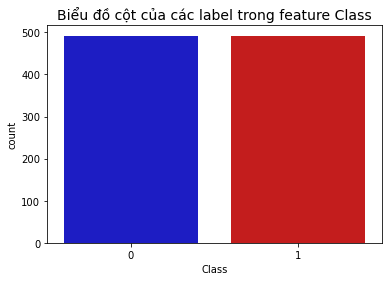

In [279]:
print('Tỉ lệ của các label trong dataset mới')
print(new_data['Class'].value_counts()/len(new_data))

colors = ["#0101DF", "#DF0101"]


sns.countplot('Class', data=new_data, palette=colors)
plt.title('Biểu đồ cột của các label trong feature Class', fontsize=14)
plt.show()

# XỬ LÝ DỮ LIỆU 

FEATURES SELECTION: CHỌN LỌC CÁC FEATURES QUAN TRỌNG 

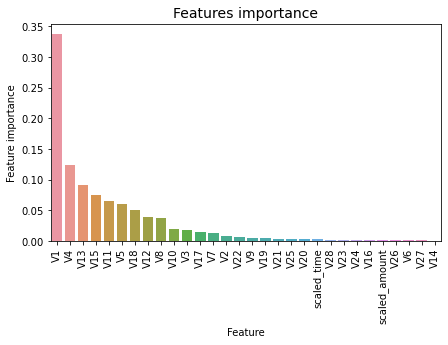

In [280]:
#Chia data thành 3 tập train/test/validition

X_train, X_test, Y_train, Y_test  = train_test_split(new_data.drop('Class', axis=1), new_data['Class'], test_size=0.2, random_state=0,shuffle=True )

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=0,shuffle=True)

RFC_METRIC = 'gini'           #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100          #number of estimators used for RandomForrestClassifier
NO_JOBS = 4                   #number of parallel jobs used for RandomForrestClassifier

#Dùng model RandomForest để chọn lọc những features quan trọng

model = RandomForestClassifier(n_jobs=4, 
                             random_state=0,
                             criterion='gini',
                             n_estimators= 100,
                             verbose=False)
# Huấn luyện mô hình Random Forrest
model.fit(X_train,Y_train)
pred_rfc = model.predict(X_valid)
# Trực quan hóa các Features quan trọng trong dataset
importances = pd.DataFrame({'Feature': all_features, 'Feature importance': model.feature_importances_})
importances =importances.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sb.barplot(x='Feature',y='Feature importance',data=importances)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

**FEATURE EXTRACTION: KHAI THÁC BIẾN ĐỘC LẬP, BIẾN PHỤ THUỘC VÀ CHỌN CÁC FEATURES QUAN TRỌNG**

In [281]:
X = new_data.drop('Class', axis=1)
Y = new_data['Class']

#Các features quan trọng được chọn ra trong list sau:     


features_importance_set = ['V1', 'V4','V13','V15','V11','V5','V18','V12','V8','V10']

#Lấy ra các điểm dữ liệu của các features trên đưa vào một dataset mới
x=X[features_importance_set]
y=Y.values



DATA TRANSFORMATION: CHUẨN HÓA DỮ LIỆU

In [282]:
SC = StandardScaler()
x_sc = SC.fit_transform(x)


#Chia data thành 2 tập train test
X_train, X_test, Y_train, Y_test  = train_test_split(x_sc, y, test_size=0.2, random_state=0,shuffle=True ) 

#Sử dụng PCA để giảm chiều dữ liệu
pca = PCA(n_components=2)  
pca.fit(X_train)  
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test)

# TRỰC QUAN HÓA DỮ LIỆU

In [283]:
def VisualizingDataset(X_, Y_):
    X1 = X_[:, 0]
    X2 = X_[:, 1]
    for i, label in enumerate(np.unique(Y_)):
        plt.scatter(X1[Y_ == label], X2[Y_ == label], color = ListedColormap(("red","green"))(i), label = label)

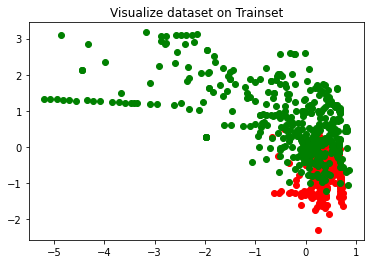

In [284]:
plt.title('Visualize dataset on Trainset')
VisualizingDataset(X_train, Y_train)
plt.show()

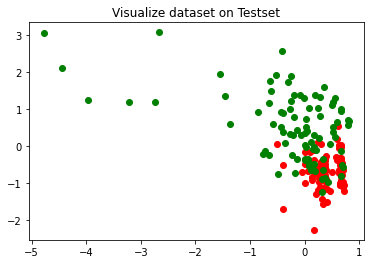

In [285]:
plt.title('Visualize dataset on Testset')
VisualizingDataset(X_test, Y_test)
plt.show()

# ***HUẤN LUYỆN MÔ HÌNH PHÂN LOẠI***

In [286]:
##Xây dựng hàm trực quan hóa các điểm dữ liệu 
def VisualizingResult(model, X_):
    X1 = X_[:, 0]
    X2 = X_[:, 1]
    X1_range = np.arange(start= X1.min()-1, stop= X1.max()+1,step = 0.01)
    X2_range = np.arange(start= X2.min()-1, stop= X2.max()+1,step = 0.01)
    X1_matrix, X2_matrix = np.meshgrid(X1_range, X2_range)
    X_grid= np.array([X1_matrix.ravel(), X2_matrix.ravel()]).T
    Y_grid= model.predict(X_grid).reshape(X1_matrix.shape)
    plt.contourf(X1_matrix, X2_matrix, Y_grid, alpha = 0.5,cmap = ListedColormap(("red", "green")))


#  1. **THUẬT TOÁN DECISION TREE**

In [287]:
classifier = DecisionTreeClassifier(criterion = "entropy",max_depth=4,random_state= 0)
classifier.fit(X_train_pca, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

**TRỰC QUAN HÓA MÔ HÌNH SAU KHI GIẢM CHIỀU **

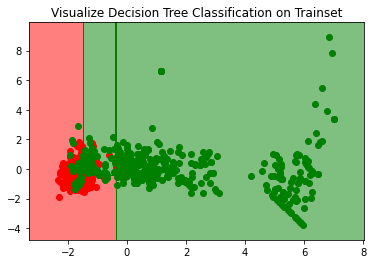

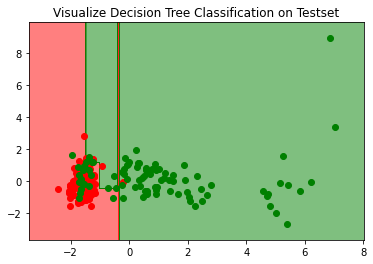

In [288]:
#Trực quan hóa mô hình

plt.title('Visualize Decision Tree Classification on Trainset')
VisualizingResult(classifier, X_train_pca)
VisualizingDataset(X_train_pca, Y_train)
plt.show()

plt.title('Visualize Decision Tree Classification on Testset')
VisualizingResult(classifier, X_test_pca)
VisualizingDataset(X_test_pca, Y_test)
plt.show()

# ĐÁNH GIÁ MÔ HÌNH PHÂN LOẠI DECISION TREE

**CONFUSION MATRIX SAU KHI GIẢM CHIỀU DỮ LIỆU BẰNG PCA **

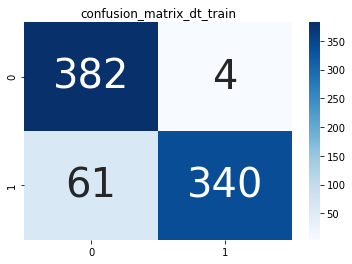

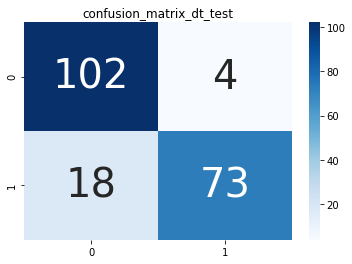

Bảng tỉ lệ dự đoán sai trên tập train và test : 
      train      test
0  0.000285  0.000386


In [289]:
score_train=[]
score_test=[]

cm_train = confusion_matrix(Y_train, classifier.predict(X_train_pca))
sb.heatmap(cm_train,annot=True,fmt='g',cmap='Blues',annot_kws={"size": 40})
plt.title('confusion_matrix_dt_train')
plt.show()


cm_test = confusion_matrix(Y_test, classifier.predict(X_test_pca))
sb.heatmap(cm_test,annot=True,fmt='g',cmap='Blues',annot_kws={"size": 40})
plt.title('confusion_matrix_dt_test')
plt.show()

#Tỷ lệ điểm dữ liệu phân loại sai 
score_train.append((float)(cm_train[0][1]+cm_train[1][0])/227845)
score_test.append((float)(cm_test[0][1]+cm_test[1][0])/56962)
df_compare = pd.DataFrame([score_train,score_test]).T
df_compare.columns = ["train","test"]
print("Bảng tỉ lệ dự đoán sai trên tập train và test : ")
print(df_compare)

**CÁC ĐỘ ĐO ACCURACY, PRECISION, RECALL SAU KHI CHIA DỮ LIỆU BẰNG KĨ THUẬT KFOLD**

In [290]:

kf = KFold(n_splits=10)
kf.get_n_splits(x)
print(kf)
KFold(n_splits=10, random_state=None, shuffle=False)
i=0
A=0
P=0
R=0
F=0
for train_index, test_index in kf.split(x):
    X_train_kf, X_test_kf = x.iloc[train_index], x.iloc[test_index]    
    Y_train_kf, Y_test_kf = Y.iloc[train_index], Y.iloc[test_index]
    i=i+1
    print("So luong mau tap train ",i,": ",X_train_kf.shape[0])
    print("So luong mau tap test ",i,": ",X_test_kf.shape[0])
    
    X_train_kf = X_train_kf.values
    X_test_kf = X_test_kf.values
    Y_train_kf = Y_train_kf.values
    Y_test_kf = Y_test_kf.values
    
    std_scaler = StandardScaler()
    X_train_kf= std_scaler.fit_transform(X_train_kf)
    X_test_kf= std_scaler.fit_transform(X_test_kf)

    model = DecisionTreeClassifier(criterion= 'entropy', max_depth = 4, random_state=0)
    model.fit(X_train_kf, Y_train_kf)
    Y_pred_kf = model.predict(X_test_kf)
    accuracy =  round(accuracy_score(Y_test_kf,Y_pred_kf) * 100, 2)   
    print("Accuracy of decision tree = ",(accuracy).astype(str) + '%')
    A=A+accuracy
    
    Precision = round(precision_score(Y_test_kf,Y_pred_kf) * 100, 2)
    print("Precision of decision tree = ",(Precision).astype(str) + '%')
    P=P+Precision
  
    Recall = round(recall_score(Y_test_kf,Y_pred_kf) * 100, 2)
    print("Recall of decision tree = ",(Recall).astype(str) + '%')
    R=R+Recall

    print('-------------------------------------------')
# KẾT QUẢ TRUNG BÌNH CỦA CÁC ĐỘ ĐO
print("Trung binh Accuracy of decision tree = ", A/10)
print("Trung binh Precision of decision tree = ", P/10)
print("Trung binh Recall of decision tree = ", R/10)


KFold(n_splits=10, random_state=None, shuffle=False)
So luong mau tap train  1 :  885
So luong mau tap test  1 :  99
Accuracy of decision tree =  98.99%
Precision of decision tree =  100.0%
Recall of decision tree =  98.04%
-------------------------------------------
So luong mau tap train  2 :  885
So luong mau tap test  2 :  99
Accuracy of decision tree =  88.89%
Precision of decision tree =  89.36%
Recall of decision tree =  87.5%
-------------------------------------------
So luong mau tap train  3 :  885
So luong mau tap test  3 :  99
Accuracy of decision tree =  91.92%
Precision of decision tree =  97.83%
Recall of decision tree =  86.54%
-------------------------------------------
So luong mau tap train  4 :  885
So luong mau tap test  4 :  99
Accuracy of decision tree =  97.98%
Precision of decision tree =  100.0%
Recall of decision tree =  96.15%
-------------------------------------------
So luong mau tap train  5 :  886
So luong mau tap test  5 :  98
Accuracy of decision tre

# **2. THUẬT TOÁN SUPORT VETOR MARCHINE**

In [291]:

classifier = SVC(kernel ="linear")
classifier.fit(X_train_pca, Y_train)

SVC(kernel='linear')

*TRỰC QUAN HÓA MÔ HÌNH SAU KHI GIẢM CHIỀU *

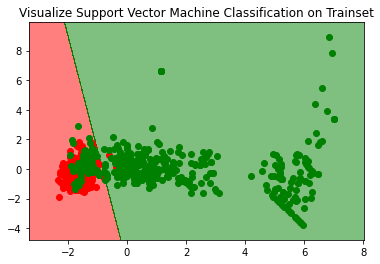

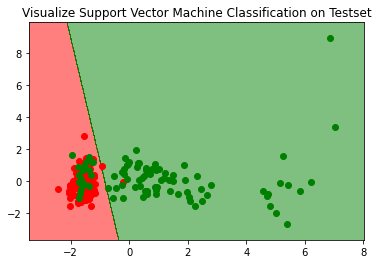

In [292]:
#Trực quan hóa mô hình

plt.title('Visualize Support Vector Machine Classification on Trainset')
VisualizingResult(classifier, X_train_pca)
VisualizingDataset(X_train_pca, Y_train)
plt.show() 

plt.title('Visualize Support Vector Machine Classification on Testset')
VisualizingResult(classifier, X_test_pca)
VisualizingDataset(X_test_pca, Y_test)
plt.show()

# ĐÁNH GIÁ MÔ HÌNH PHÂN LOẠI SUPPORT VECTOR MACHINE

*CONFUSION MATRIX SAU KHI GIẢM CHIỀU DỮ LIỆU BẰNG PCA *

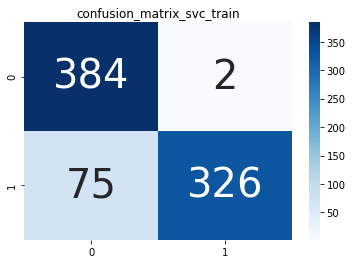

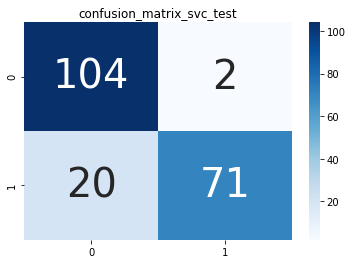

bảng tỉ lệ dự đoán sai trên tập train và test : 
      train      test
0  0.000338  0.000386


In [293]:
score_train=[]
score_test=[]

cm_train = confusion_matrix(Y_train, classifier.predict(X_train_pca))
sb.heatmap(cm_train,annot=True,fmt='g',cmap='Blues',annot_kws={"size": 40})
plt.title('confusion_matrix_svc_train')
plt.show()

cm_test = confusion_matrix(Y_test, classifier.predict(X_test_pca))
sb.heatmap(cm_test,annot=True,fmt='g',cmap='Blues',annot_kws={"size": 40})
plt.title('confusion_matrix_svc_test')
plt.show()

#Tỷ lệ điểm dữ liệu phân loại sai 
score_train.append((float)(cm_train[0][1]+cm_train[1][0])/227845)
score_test.append((float)(cm_test[0][1]+cm_test[1][0])/56962)
df_compare = pd.DataFrame([score_train,score_test]).T
df_compare.columns = ["train","test"]
print("bảng tỉ lệ dự đoán sai trên tập train và test : ")
print(df_compare)

CÁC ĐỘ ĐO ACCURACY, PRECISION, RECALL SAU KHI CHIA DỮ LIỆU BẰNG KĨ THUẬT KFOLD

In [294]:

kf = KFold(n_splits=10)
kf.get_n_splits(x)
print(kf)
KFold(n_splits=10, random_state=None, shuffle=False)
i=0
A=0
P=0
R=0
F=0
for train_index, test_index in kf.split(x):
    X_train_kf, X_test_kf = x.iloc[train_index], x.iloc[test_index]    
    Y_train_kf, Y_test_kf = Y.iloc[train_index], Y.iloc[test_index]
    i=i+1
    print("So luong mau tap train ",i,": ",X_train_kf.shape[0])
    print("So luong mau tap test ",i,": ",X_test_kf.shape[0])
    
    X_train_kf = X_train_kf.values
    X_test_kf = X_test_kf.values
    Y_train_kf = Y_train_kf .values
    Y_test_kf = Y_test_kf.values
    
    std_scaler = StandardScaler()
    X_train_kf= std_scaler.fit_transform(X_train_kf)
    X_test_kf= std_scaler.fit_transform(X_test_kf)

    model =  SVC(kernel ="linear")
    model.fit(X_train_kf, Y_train_kf)
    Y_pred_kf = model.predict(X_test_kf)
    accuracy =  round(accuracy_score(Y_test_kf,Y_pred_kf) * 100, 2)   
    print("Accuracy of SVC = ",(accuracy).astype(str) + '%')
    A=A+accuracy
    
    Precision = round(precision_score(Y_test_kf,Y_pred_kf) * 100, 2)
    print("Precision of SVC = ",(Precision).astype(str) + '%')
    P=P+Precision
  
    Recall = round(recall_score(Y_test_kf,Y_pred_kf) * 100, 2)
    print("Recall of SVC = ",(Recall).astype(str) + '%')
    R=R+Recall
    print('-------------------------------------------')
# KẾT QUẢ TRUNG BÌNH CỦA CÁC ĐỘ ĐO
print("Trung binh Accuracy of SVC = ", A/10)
print("Trung binh Precision of SVC = ", P/10)
print("Trung binh Recall of SVC = ", R/10)

KFold(n_splits=10, random_state=None, shuffle=False)
So luong mau tap train  1 :  885
So luong mau tap test  1 :  99
Accuracy of SVC =  95.96%
Precision of SVC =  100.0%
Recall of SVC =  92.16%
-------------------------------------------
So luong mau tap train  2 :  885
So luong mau tap test  2 :  99
Accuracy of SVC =  93.94%
Precision of SVC =  97.73%
Recall of SVC =  89.58%
-------------------------------------------
So luong mau tap train  3 :  885
So luong mau tap test  3 :  99
Accuracy of SVC =  91.92%
Precision of SVC =  100.0%
Recall of SVC =  84.62%
-------------------------------------------
So luong mau tap train  4 :  885
So luong mau tap test  4 :  99
Accuracy of SVC =  97.98%
Precision of SVC =  100.0%
Recall of SVC =  96.15%
-------------------------------------------
So luong mau tap train  5 :  886
So luong mau tap test  5 :  98
Accuracy of SVC =  93.88%
Precision of SVC =  97.87%
Recall of SVC =  90.2%
-------------------------------------------
So luong mau tap train 

# 3. THUẬT TOÁN LOGISTIC REGRESSION

In [295]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_pca, Y_train)

LogisticRegression(random_state=0)

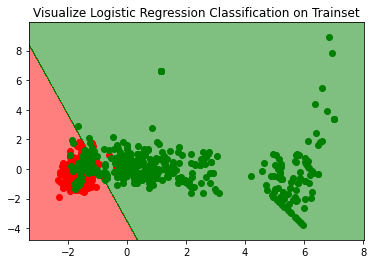

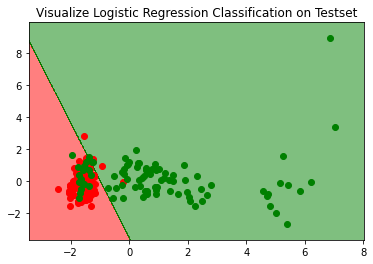

In [296]:
#Trực quan hóa mô hình

plt.title('Visualize Logistic Regression Classification on Trainset')
VisualizingResult(classifier, X_train_pca)
VisualizingDataset(X_train_pca, Y_train)
plt.show()

plt.title('Visualize Logistic Regression Classification on Testset')
VisualizingResult(classifier, X_test_pca)
VisualizingDataset(X_test_pca, Y_test)
plt.show()

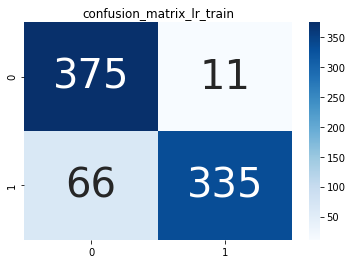

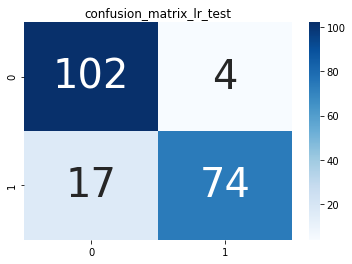

Bảng tỉ lệ dự đoán sai trên tập train và test : 
      train      test
0  0.000338  0.000369


In [297]:
score_train=[]
score_test=[]

cm_train = confusion_matrix(Y_train, classifier.predict(X_train_pca))
sb.heatmap(cm_train,annot=True,fmt='g',cmap='Blues',annot_kws={"size": 40})
plt.title('confusion_matrix_lr_train')
plt.show()

cm_test = confusion_matrix(Y_test, classifier.predict(X_test_pca))
sb.heatmap(cm_test,annot=True,fmt='g',cmap='Blues',annot_kws={"size": 40})
plt.title('confusion_matrix_lr_test')
plt.show()

#Tỷ lệ điểm dữ liệu phân loại sai 
score_train.append((float)(cm_train[0][1]+cm_train[1][0])/227845)
score_test.append((float)(cm_test[0][1]+cm_test[1][0])/56962)
df_compare = pd.DataFrame([score_train,score_test]).T
df_compare.columns = ["train","test"]
print("Bảng tỉ lệ dự đoán sai trên tập train và test : ")
print(df_compare)

In [298]:

kf = KFold(n_splits=10)
kf.get_n_splits(x)
print(kf)
KFold(n_splits=10, random_state=None, shuffle=False)
i=0
A=0
P=0
R=0
F=0
for train_index, test_index in kf.split(x):
    X_train_kf, X_test_kf = x.iloc[train_index], x.iloc[test_index]    
    Y_train_kf, Y_test_kf = Y.iloc[train_index], Y.iloc[test_index]
    i=i+1
    print("So luong mau tap train ",i,": ",X_train_kf.shape[0])
    print("So luong mau tap test ",i,": ",X_test_kf.shape[0])
    
    X_train_kf = X_train_kf.values
    X_test_kf = X_test_kf.values
    Y_train_kf = Y_train_kf .values
    Y_test_kf = Y_test_kf.values
    
    std_scaler = StandardScaler()
    X_train_kf= std_scaler.fit_transform(X_train_kf)
    X_test_kf= std_scaler.fit_transform(X_test_kf)

    model = LogisticRegression(random_state=0)
    model.fit(X_train_kf, Y_train_kf)
    Y_pred_kf = model.predict(X_test_kf)
    accuracy =  round(accuracy_score(Y_test_kf,Y_pred_kf) * 100, 2)   
    print("Accuracy of Ligistic Regression = ",(accuracy).astype(str) + '%')
    A=A+accuracy
    
    Precision = round(precision_score(Y_test_kf,Y_pred_kf) * 100, 2)
    print("Precision of Ligistic Regression = ",(Precision).astype(str) + '%')
    P=P+Precision
  
    Recall = round(recall_score(Y_test_kf,Y_pred_kf) * 100, 2)
    print("Recall of Ligistic Regression = ",(Recall).astype(str) + '%')
    R=R+Recall
    print('-------------------------------------------')
# KẾT QUẢ TRUNG BÌNH CỦA CÁC ĐỘ ĐO
print("Trung binh Accuracy of Ligistic Regression = ", A/10)
print("Trung binh Precision of Ligistic Regression = ", P/10)
print("Trung binh Recall of Ligistic Regression = ", R/10)

KFold(n_splits=10, random_state=None, shuffle=False)
So luong mau tap train  1 :  885
So luong mau tap test  1 :  99
Accuracy of Ligistic Regression =  97.98%
Precision of Ligistic Regression =  100.0%
Recall of Ligistic Regression =  96.08%
-------------------------------------------
So luong mau tap train  2 :  885
So luong mau tap test  2 :  99
Accuracy of Ligistic Regression =  93.94%
Precision of Ligistic Regression =  97.73%
Recall of Ligistic Regression =  89.58%
-------------------------------------------
So luong mau tap train  3 :  885
So luong mau tap test  3 :  99
Accuracy of Ligistic Regression =  92.93%
Precision of Ligistic Regression =  100.0%
Recall of Ligistic Regression =  86.54%
-------------------------------------------
So luong mau tap train  4 :  885
So luong mau tap test  4 :  99
Accuracy of Ligistic Regression =  96.97%
Precision of Ligistic Regression =  98.04%
Recall of Ligistic Regression =  96.15%
-------------------------------------------
So luong mau ta